In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


          id         emp_title application_type home_ownership  loan_status  \
0  113924213         Stagehand       Individual           RENT   Fully Paid   
1  113101099  Detention Deputy       Individual           RENT  Charged Off   
2  113672609               NaN       Individual       MORTGAGE      Current   
3  115053799            Driver       Individual           RENT   Fully Paid   
4    6317122   JP Morgan Chase       Individual       MORTGAGE   Fully Paid   

   loan_amnt  int_rate       term  installment grade  ... pct_tl_nvr_dlq  \
0      35000    0.1505  36 months      1214.15     C  ...           80.0   
1      21000    0.1408  60 months       489.51     C  ...          100.0   
2      20000    0.1408  60 months       466.20     C  ...          100.0   
3      16000    0.1903  36 months       586.74     D  ...           95.7   
4      24000    0.0890  60 months       497.04     A  ...          100.0   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens  revol_bal_joint  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

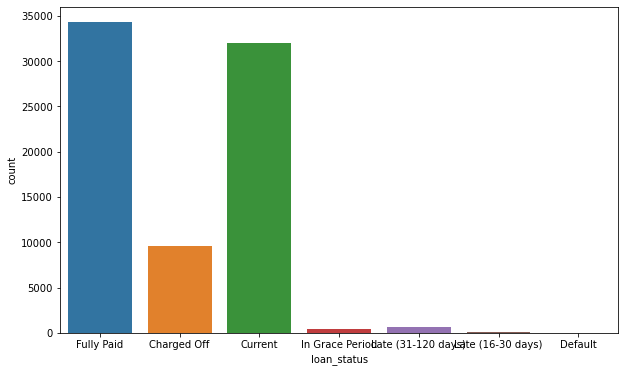

In [2]:
#designate the path where you saved your Iris data
Lending_data_path = "E:\DATA_MINING\CW2\LendingClubLoans2018-2020.xlsx"

#Load the data using pandas read_csv function. 
Lending_data = pd.read_excel(Lending_data_path)
Lending_data1=Lending_data
#Lending_data=Lending_data.iloc[:40000]

#Show the first and last few records to check data is loading correctly
print(Lending_data.head())
print(Lending_data.tail())

#Show distribution of the class on whole dataset
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x= 'loan_status',ax=ax, data=Lending_data)

In [3]:
#Lending_data.'loan status'.value_counts()
Lending_data["loan_status"].value_counts()

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

In [4]:
Lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Columns: 108 entries, id to orig_projected_additional_accrued_interest
dtypes: datetime64[ns](5), float64(49), int64(39), object(15)
memory usage: 63.6+ MB


In [1192]:
#Lending_data[Lending_data.columns[0:]].corr()['loan_status'][:]
#corrValue1 = Lending_data[Lending_data.columns[0:]].corr()['loan_status']
#corrValue1
#correlated_data1 =Lending_data[Lending_data.columns[ corrValue1 < 0.2]]
#correlated_data1.info()
basedata_corr = Lending_data.corr()
basedata_corr

,id,loan_amnt,int_rate,installment,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,inq_fi,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
id,1.000000,-0.086232,-0.165858,-0.040787,0.002407,0.013109,0.005059,0.057334,-0.010627,0.007791,...,-0.015714,-0.117004,0.023004,0.006067,0.038593,-0.109354,-0.006977,0.065107,0.028187,0.012601
loan_amnt,-0.086232,1.000000,0.108669,0.944546,0.270566,0.355713,0.048588,0.051770,-0.011316,-0.003999,...,0.086423,0.035916,-0.057044,0.005139,0.379847,0.057499,0.269809,0.704770,0.233985,0.485180
int_rate,-0.165858,0.108669,1.000000,0.151765,-0.063098,-0.121111,0.086994,0.224707,0.066541,0.148416,...,-0.103456,0.302720,0.060035,0.025229,0.001242,0.115138,0.079050,0.290499,0.035771,0.503280
installment,-0.040787,0.944546,0.151765,1.000000,0.260793,0.327009,0.052429,0.073644,0.001040,0.007625,...,0.065080,0.061341,-0.048760,0.013725,0.351387,0.078328,0.316043,0.521531,0.227883,0.405076
annual_inc,0.002407,0.270566,-0.063098,0.260793,1.000000,0.724864,-0.094408,-0.138774,0.031596,0.052710,...,-0.015532,0.004615,-0.032898,0.032213,0.370722,0.017941,0.080421,0.227058,0.091611,0.118995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deferral_term,-0.109354,0.057499,0.115138,0.078328,0.017941,0.034808,-0.053860,-0.058072,0.002484,0.020185,...,-0.011490,0.029140,0.039654,0.018369,-0.025775,1.000000,0.356398,0.149659,-0.140591,0.398036
hardship_amount,-0.006977,0.269809,0.079050,0.316043,0.080421,0.059639,0.034566,0.090978,0.032081,-0.006035,...,0.005805,0.103416,-0.019517,-0.004864,0.110944,0.356398,1.000000,0.008471,0.317094,0.081077
hardship_payoff_balance_amount,0.065107,0.704770,0.290499,0.521531,0.227058,0.234859,0.077793,0.081441,-0.039766,0.061473,...,0.066645,0.026172,0.024606,0.014735,0.294446,0.149659,0.008471,1.000000,-0.082226,0.777647
hardship_last_payment_amount,0.028187,0.233985,0.035771,0.227883,0.091611,0.068017,0.018203,-0.008898,0.013655,0.010832,...,0.025415,0.039922,-0.024697,-0.005487,0.030520,-0.140591,0.317094,-0.082226,1.000000,-0.061678


In [1193]:
#Correlation with output variable
#cor_target = abs(basedata_corr["loan_status"])
#Selecting highly correlated features
#relevant_features1 = cor_target[cor_target>=0.1]
#relevant_features1

In [5]:
datetype = Lending_data.select_dtypes(include=['object'])
#datetype

In [6]:
Lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Columns: 108 entries, id to orig_projected_additional_accrued_interest
dtypes: datetime64[ns](5), float64(49), int64(39), object(15)
memory usage: 63.6+ MB


In [7]:
#Spliting Categorical and numerical data 
Cat_data=Lending_data.select_dtypes(include='object')
Num_data=Lending_data.select_dtypes(exclude=['object'])
Num_data.info()
print(Cat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          77159 non-null  int64         
 1   loan_amnt                                   77159 non-null  int64         
 2   int_rate                                    77159 non-null  float64       
 3   installment                                 77159 non-null  float64       
 4   earliest_cr_line                            77159 non-null  datetime64[ns]
 5   issue_d                                     77159 non-null  datetime64[ns]
 6   last_pymnt_d                                77159 non-null  datetime64[ns]
 7   next_pymnt_d                                33256 non-null  datetime64[ns]
 8   annual_inc                                  77159 non-null  float64       
 9   annual

<AxesSubplot:ylabel='Frequency'>

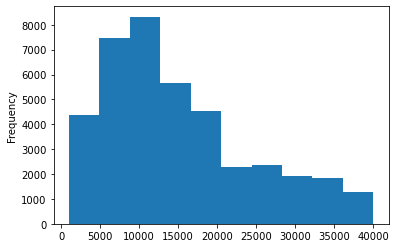

In [1197]:
Lending_data['loan_amnt'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

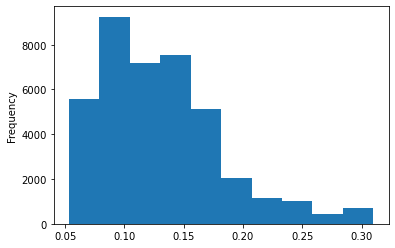

In [1198]:
Lending_data['int_rate'].plot.hist()

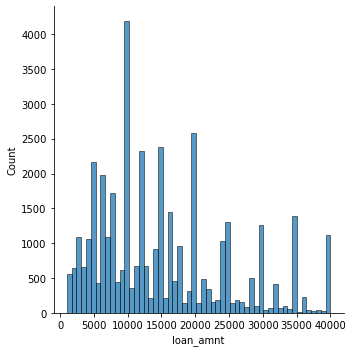

In [1199]:
sns.displot(Lending_data['loan_amnt'], kde=False)

In [1200]:
#Finding count of null values column wise in dataset.
missing_value= Lending_data.isnull().sum()
missing_value
#Finding percentage of null values column wise in dataset.
missing= missing_value * 100 / len(Lending_data)
missing

id                                             0.0000
emp_title                                      7.5700
application_type                               0.0000
home_ownership                                 0.0000
loan_status                                    0.0000
                                               ...   
deferral_term                                 94.1725
hardship_amount                               92.0625
hardship_payoff_balance_amount                92.0625
hardship_last_payment_amount                  92.0625
orig_projected_additional_accrued_interest    92.2300
Length: 108, dtype: float64

In [1201]:
above60 = (missing>60)
above60.describe()

count       108
unique        2
top       False
freq         91
dtype: object

In [1202]:
threshold = 0.6 * len(Lending_data)
threshold

24000.0

In [1203]:
drop=missing>threshold
drop.describe()

count       108
unique        1
top       False
freq        108
dtype: object

In [1204]:
dropabove60 =Lending_data[Lending_data.columns[missing<55]]
dropabove60.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,...,5,6,5,7,0,1,80.0,0.0,0,0
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,...,10,11,5,13,0,1,100.0,33.3,1,0
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,...,12,17,7,14,0,2,100.0,18.2,0,0
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,...,8,27,8,10,0,2,95.7,75.0,1,0
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,...,7,11,4,12,0,1,100.0,0.0,0,0


In [1205]:
dropabove60["loan_status"].value_counts()

Fully Paid            17783
Current               16627
Charged Off            4970
Late (31-120 days)      347
In Grace Period         214
Late (16-30 days)        50
Default                   9
Name: loan_status, dtype: int64

In [1206]:
Cat_data1=dropabove60.select_dtypes(include='object')
Cat_data1.isna().sum()

emp_title              3028
application_type          0
home_ownership            0
loan_status               0
term                      0
                       ... 
verification_status       0
pymnt_plan                0
purpose                   0
hardship_flag           845
initial_list_status       0
Length: 11, dtype: int64

In [1207]:
#immputation
import category_encoders as ce

# We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(Cat_data1,handle_missing='value',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
x=enc.fit_transform(dropabove60)
#x



In [1208]:
x=x.drop(['last_pymnt_d','earliest_cr_line','issue_d'],axis=1)


In [1209]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          40000 non-null  int64  
 1   emp_title                   40000 non-null  int32  
 2   application_type            40000 non-null  int32  
 3   home_ownership              40000 non-null  int32  
 4   loan_status                 40000 non-null  int32  
 5   loan_amnt                   40000 non-null  int64  
 6   int_rate                    40000 non-null  float64
 7   term                        40000 non-null  int32  
 8   installment                 40000 non-null  float64
 9   grade                       40000 non-null  int32  
 10  annual_inc                  40000 non-null  float64
 11  verification_status         40000 non-null  int32  
 12  pymnt_plan                  40000 non-null  int32  
 13  purpose                     400

In [1210]:
corrvalue5=x.corr()
#Correlation with output variable
cor_target = abs(corrvalue5["loan_status"])
#Selecting highly correlated features
relevant_features3 = cor_target[cor_target>=0.1]
relevant_features3

id                      0.189568
loan_status             1.000000
term                    0.104614
hardship_flag           0.244255
last_fico_range_high    0.103097
                          ...   
out_prncp_inv           0.534694
total_pymnt             0.131563
total_pymnt_inv         0.131526
total_rec_prncp         0.221993
total_rec_int           0.155591
Name: loan_status, Length: 11, dtype: float64

In [1211]:
print(x.info())
x.isnull().sum()
FinalCols = x.columns
FinalCols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          40000 non-null  int64  
 1   emp_title                   40000 non-null  int32  
 2   application_type            40000 non-null  int32  
 3   home_ownership              40000 non-null  int32  
 4   loan_status                 40000 non-null  int32  
 5   loan_amnt                   40000 non-null  int64  
 6   int_rate                    40000 non-null  float64
 7   term                        40000 non-null  int32  
 8   installment                 40000 non-null  float64
 9   grade                       40000 non-null  int32  
 10  annual_inc                  40000 non-null  float64
 11  verification_status         40000 non-null  int32  
 12  pymnt_plan                  40000 non-null  int32  
 13  purpose                     400

Index(['id', 'emp_title', 'application_type', 'home_ownership', 'loan_status',
       'loan_amnt', 'int_rate', 'term', 'installment', 'grade', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'hardship_flag', 'dti',
       'delinq_2yrs', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'mths_since_rcnt_il', 'mths_since_last_delinq',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',

In [1212]:
x.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,113924213,1,1,1,1,35000,0.1505,1,1214.15,1,...,5,6,5,7,0,1,80.0,0.0,0,0
1,113101099,2,1,1,2,21000,0.1408,2,489.51,1,...,10,11,5,13,0,1,100.0,33.3,1,0
2,113672609,3,1,2,3,20000,0.1408,2,466.20,1,...,12,17,7,14,0,2,100.0,18.2,0,0
3,115053799,4,1,1,1,16000,0.1903,1,586.74,2,...,8,27,8,10,0,2,95.7,75.0,1,0
4,6317122,5,1,2,1,24000,0.0890,2,497.04,3,...,7,11,4,12,0,1,100.0,0.0,0,0


In [1213]:

#import the relevant methods
from sklearn.impute import KNNImputer
nan = np.nan

#Apply KNN imputer
imputer = KNNImputer(n_neighbors=4, weights="uniform")
ImputedX=imputer.fit_transform(x)




In [1214]:
ImputedX.shape

#type(ImputedX)
#datFrame_imputedX= pd.DataFrame(ImputedX)
#type(datFrame_imputedX)

(40000, 87)

In [1300]:
# Convert output to a data frame to show the stats
Clean_data = pd.DataFrame.from_records(ImputedX)
Clean_data.columns = FinalCols
Clean_data.info()
#Let us see missing values now for the transformed data
missing_val_count_by_column = Clean_data.isnull().sum()
missing_val_count_by_column
print('Missing columns for the Train data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          40000 non-null  float64
 1   emp_title                   40000 non-null  float64
 2   application_type            40000 non-null  float64
 3   home_ownership              40000 non-null  float64
 4   loan_status                 40000 non-null  float64
 5   loan_amnt                   40000 non-null  float64
 6   int_rate                    40000 non-null  float64
 7   term                        40000 non-null  float64
 8   installment                 40000 non-null  float64
 9   grade                       40000 non-null  float64
 10  annual_inc                  40000 non-null  float64
 11  verification_status         40000 non-null  float64
 12  pymnt_plan                  40000 non-null  float64
 13  purpose                     400

In [1216]:
xyq= Clean_data.drop(['pymnt_plan'], axis=1)
print(xyq.info())

xyq.to_csv('Clean_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          40000 non-null  float64
 1   emp_title                   40000 non-null  float64
 2   application_type            40000 non-null  float64
 3   home_ownership              40000 non-null  float64
 4   loan_status                 40000 non-null  float64
 5   loan_amnt                   40000 non-null  float64
 6   int_rate                    40000 non-null  float64
 7   term                        40000 non-null  float64
 8   installment                 40000 non-null  float64
 9   grade                       40000 non-null  float64
 10  annual_inc                  40000 non-null  float64
 11  verification_status         40000 non-null  float64
 12  purpose                     40000 non-null  float64
 13  hardship_flag               400

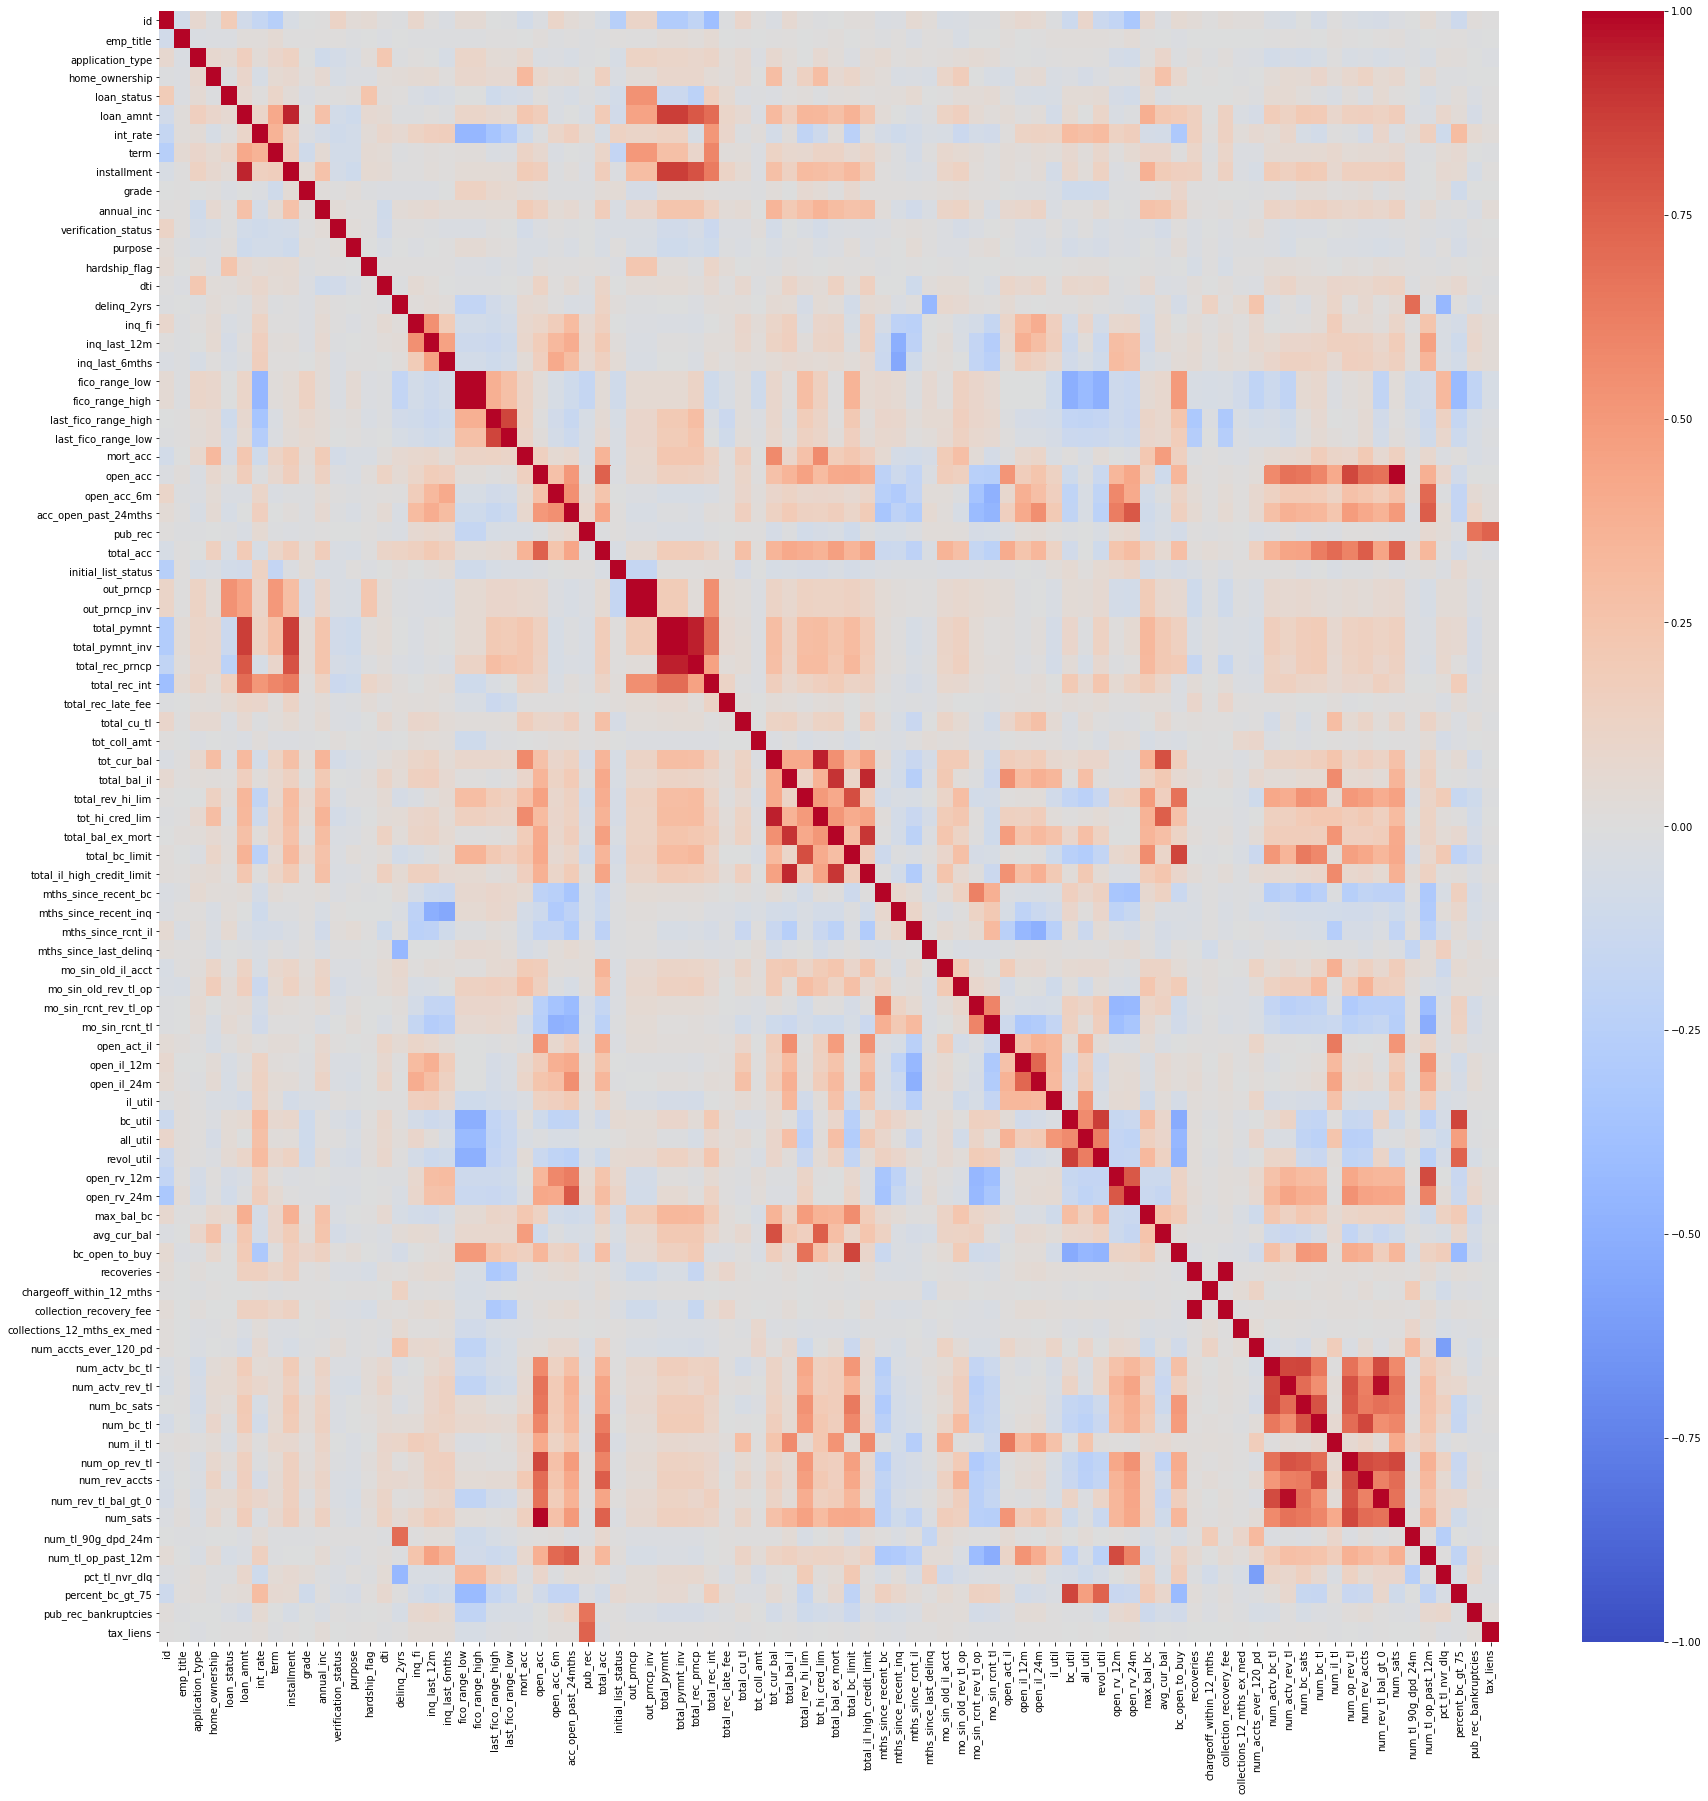

In [1217]:
#heat map
f, ax = plt.subplots(figsize=(30,30))
ax=sns.heatmap(xyq.corr(),cmap='coolwarm', vmin=-1, vmax=1)

In [1218]:
#Clean_data[Clean_data.columns[0:]].corr()['loan_status'][:]
corrValue = xyq.corr()
#correlated_data =Clean_data[Clean_data.columns[ corrValue >= 0.2]]
#correlated_data.info()
#corrValue

In [1219]:
#f, ax = plt.subplots(figsize=(20,20))
#ax=sns.heatmap(corrValue.corr(),cmap='coolwarm', vmin=-1, vmax=1)

In [1291]:
#corrValue = Clean_data[Clean_data.columns[0:]].corr()['loan_status'][:].abs()
corrValue2 = abs(xyq.corr())
corrValue2


,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
id,1.000000,0.090789,0.076362,0.013979,0.189568,0.086232,0.165858,0.256296,0.040787,0.001501,...,0.025145,0.053100,0.056522,0.017625,0.000816,0.042455,0.015649,0.116825,0.023004,0.006067
emp_title,0.090789,1.000000,0.030106,0.023435,0.022735,0.018985,0.022699,0.049534,0.006807,0.003532,...,0.004777,0.006034,0.011411,0.017816,0.008010,0.002830,0.004840,0.013286,0.010394,0.004955
application_type,0.076362,0.030106,1.000000,0.076508,0.048958,0.159658,0.037089,0.100896,0.136998,0.005079,...,0.042182,0.026728,0.048890,0.026017,0.014026,0.037323,0.024518,0.017962,0.000989,0.016998
home_ownership,0.013979,0.023435,0.076508,1.000000,0.013404,0.095488,0.051052,0.059256,0.075328,0.014926,...,0.083044,0.125794,0.061186,0.085458,0.004958,0.053150,0.009701,0.013017,0.003645,0.003337
loan_status,0.189568,0.022735,0.048958,0.013404,1.000000,0.069687,0.008888,0.104614,0.035801,0.028744,...,0.019876,0.018405,0.057226,0.015084,0.001485,0.050020,0.013942,0.029115,0.023760,0.007641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
num_tl_op_past_12m,0.042455,0.002830,0.037323,0.053150,0.050020,0.028277,0.149375,0.014643,0.004241,0.007275,...,0.370572,0.321180,0.271424,0.378241,0.007938,1.000000,0.001126,0.188452,0.077190,0.018518
pct_tl_nvr_dlq,0.015649,0.004840,0.024518,0.009701,0.013942,0.086419,0.103456,0.041813,0.065079,0.033335,...,0.134069,0.055671,0.094258,0.098007,0.254779,0.001126,1.000000,0.043670,0.086971,0.018983
percent_bc_gt_75,0.116825,0.013286,0.017962,0.013017,0.029115,0.035020,0.300692,0.065587,0.060329,0.099994,...,0.141474,0.126526,0.086777,0.093979,0.005679,0.188452,0.043670,1.000000,0.013781,0.014366
pub_rec_bankruptcies,0.023004,0.010394,0.000989,0.003645,0.023760,0.057044,0.060035,0.001079,0.048760,0.006315,...,0.022011,0.031287,0.001725,0.010917,0.017412,0.077190,0.086971,0.013781,1.000000,0.024569


In [1221]:
#pd.set_option("max_rows", None)
#corrValuPercentage = (corrValue2 * 100).abs()
#corrValuPercentage

In [1222]:
#corrValue2.info()
#correlated_data =xyq[corrValuPercentage >= 20]
#correlated_data

In [1293]:
columns = np.full((corrValue2.shape[0],), True, dtype=bool)
#print(columns)
for i in range(corrValue2.shape[0]):
    for j in range(i+1, corrValue2.shape[0]):
        if (corrValue2.iloc[i,j] >= 0.8):
            #print((0.2 <= corrValue2.iloc[i,j] >= 0.8))
            if columns[j]:
                columns[j] = False
selected_columns = xyq.columns[columns]
print(selected_columns)
data = xyq[selected_columns]
data.info()

Index(['id', 'emp_title', 'application_type', 'home_ownership', 'loan_status',
       'loan_amnt', 'int_rate', 'term', 'grade', 'annual_inc',
       'verification_status', 'purpose', 'hardship_flag', 'dti', 'delinq_2yrs',
       'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'fico_range_low',
       'last_fico_range_high', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'bc_util', 'all_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'recoveries', 'chargeoff_within_12_mths',
       'collections_12_mths

In [1224]:
'''columns = np.full((corrValue2.shape[0],), False, dtype=bool)
print(columns)
for i in range(corrValue2.shape[0]):
    for j in range(i+1, corrValue2.shape[0]):
        if (0.2 <= corrValue2.iloc[i,j] <= 0.8):
            
            print(corrValue2.iloc[i,j])
         #   if columns[j]:
            columns[j] = True
selected_columns = xyq.columns[columns]
print(selected_columns)
data = xyq[selected_columns]
data.info()'''

'columns = np.full((corrValue2.shape[0],), False, dtype=bool)\nprint(columns)\nfor i in range(corrValue2.shape[0]):\n    for j in range(i+1, corrValue2.shape[0]):\n        if (0.2 <= corrValue2.iloc[i,j] <= 0.8):\n            \n            print(corrValue2.iloc[i,j])\n         #   if columns[j]:\n            columns[j] = True\nselected_columns = xyq.columns[columns]\nprint(selected_columns)\ndata = xyq[selected_columns]\ndata.info()'

In [1225]:
data= data.drop(['id','emp_title'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_type            40000 non-null  float64
 1   home_ownership              40000 non-null  float64
 2   loan_status                 40000 non-null  float64
 3   loan_amnt                   40000 non-null  float64
 4   int_rate                    40000 non-null  float64
 5   term                        40000 non-null  float64
 6   grade                       40000 non-null  float64
 7   annual_inc                  40000 non-null  float64
 8   verification_status         40000 non-null  float64
 9   purpose                     40000 non-null  float64
 10  hardship_flag               40000 non-null  float64
 11  dti                         40000 non-null  float64
 12  delinq_2yrs                 40000 non-null  float64
 13  inq_fi                      400

In [1226]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(eps = 3,min_samples = 40,algorithm ='auto' )
clusters = outlier_detection.fit_predict(data)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

[-1 -1 -1 ... -1 -1 -1]
Total number of outliers identified is:  40000


In [1227]:
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

Ground truth: 
 [-1 -1 -1 ... -1 -1 -1]


Number of predicted outliers: 400


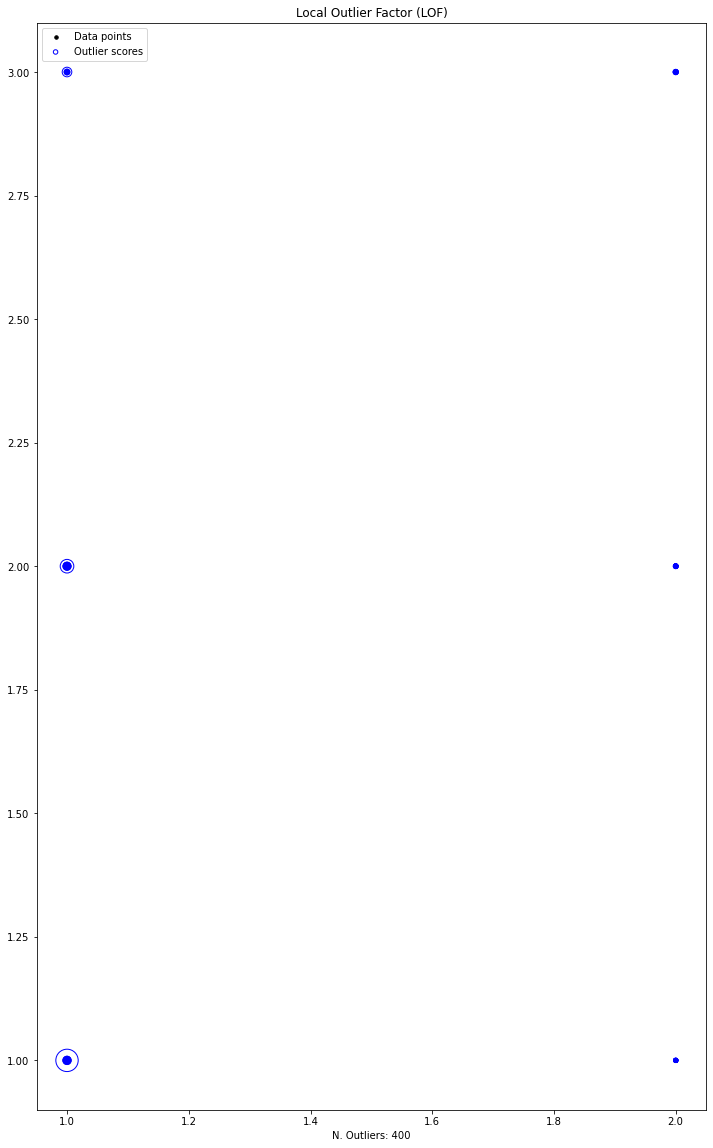

1.0


In [1228]:


from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=40, contamination="auto")

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(data)

#print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)


#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,20))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = data.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 0], Xol[:, 1], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 0], Xol[:, 1], s=500 * radius, edgecolors='blue',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((0, 14))
#plt.ylim((0, 6))
plt.xlabel("N. Outliers: %d" % (outlierN))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()
perentage_of_outliers= outlierN/ len(Lending_data)
print(perentage_of_outliers * 100)

In [1416]:
#spliting in X and Y.

X= data
y = xyq['loan_status']
y.value_counts()
print(X.shape)
print(xyq['loan_status'])

(40000, 62)
0        1.0
1        2.0
2        3.0
3        1.0
4        1.0
        ... 
39995    1.0
39996    3.0
39997    2.0
39998    1.0
39999    3.0
Name: loan_status, Length: 40000, dtype: float64


In [1230]:
X_corr=X.corr().abs()
print(X_corr)


                      application_type  home_ownership  loan_status  \
application_type              1.000000        0.076508     0.048958   
home_ownership                0.076508        1.000000     0.013404   
loan_status                   0.048958        0.013404     1.000000   
loan_amnt                     0.159658        0.095488     0.069687   
int_rate                      0.037089        0.051052     0.008888   
...                                ...             ...          ...   
num_il_tl                     0.003452        0.031277     0.037570   
num_tl_90g_dpd_24m            0.014026        0.004958     0.001485   
pct_tl_nvr_dlq                0.024518        0.009701     0.013942   
pub_rec_bankruptcies          0.000989        0.003645     0.023760   
tax_liens                     0.016998        0.003337     0.007641   

                      loan_amnt  int_rate      term     grade  annual_inc  \
application_type       0.159658  0.037089  0.100896  0.005079    0.094

In [1231]:
#data= pd.DataFrame(data)
#data.head()

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

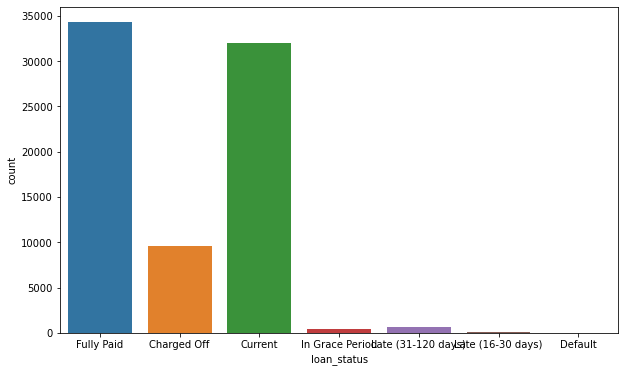

In [1264]:
#Show distribution of the class on whole dataset
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x= 'loan_status',ax=ax, data=Lending_data1)
Lending_data1["loan_status"].value_counts()

In [1417]:
#Split X and Y in tain anf TEst
from sklearn.model_selection import train_test_split

#using stratify spliting since data set is higly imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(y_train)
X_train.info()

8981     1.0
11486    3.0
10416    3.0
36509    1.0
13765    3.0
        ... 
9153     1.0
24679    2.0
26878    3.0
19912    3.0
35252    1.0
Name: loan_status, Length: 32000, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 8981 to 35252
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          32000 non-null  float64
 1   emp_title                   32000 non-null  float64
 2   application_type            32000 non-null  float64
 3   home_ownership              32000 non-null  float64
 4   loan_status                 32000 non-null  float64
 5   loan_amnt                   32000 non-null  float64
 6   int_rate                    32000 non-null  float64
 7   term                        32000 non-null  float64
 8   grade                       32000 non-null  float64
 9   annual_inc                  32000 non-null  float64
 10  verific

In [1418]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [1419]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1.0: 14226, 3.0: 14226, 2.0: 14226, 4.0: 14226, 5.0: 14226, 6.0: 14226, 7.0: 14226})
Testing target statistics: Counter({1.0: 3557, 3.0: 3325, 2.0: 994, 5.0: 69, 4.0: 43, 6.0: 10, 7.0: 2})


# Classifier K-NN

In [1425]:
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf_knn=clf_nn
clf_knn.fit(X_res,y_res)
y_hat = clf_knn.predict(X_test)
y_hat

array([1., 1., 3., ..., 1., 2., 2.])

In [1424]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat)
print('Sklearn calculated accuracy:',accuracy)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts, = np.where(y_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts))

manual_accuracy = len(counts) / len(y_test)

print('Manual accuracy:',manual_accuracy)
print(counts)
print('Prediction', y_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.431
Number of data points in test data: 8000
Number of data points where prediction is correct: 3448
Manual accuracy: 0.431
[   0    1    3 ... 7990 7994 7995]
Prediction [1. 1. 3. ... 1. 2. 2.]
Actual     31274    1.0
21984    1.0
15062    1.0
7049     3.0
8206     3.0
        ... 
35788    3.0
31398    3.0
37395    3.0
475      1.0
9524     3.0
Name: loan_status, Length: 8000, dtype: float64


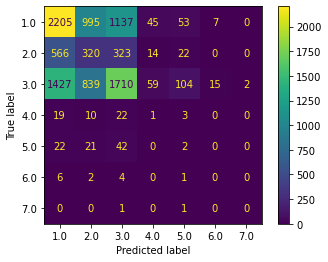

In [1089]:
#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_knn, X_test, y_test)


Minimum error:- 0.44 at K = 0


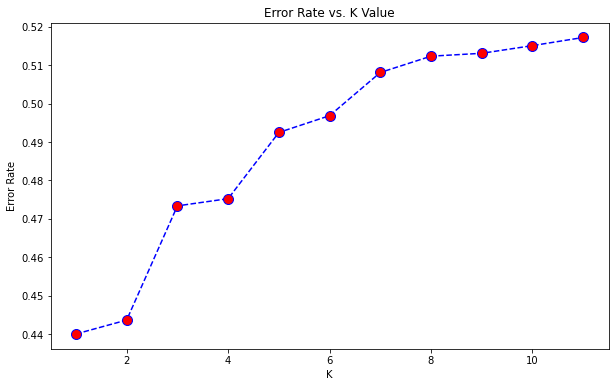

In [1279]:
error_rate = []
for i in range(1,12):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_res,y_res)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Decision Tree classifier

In [1272]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth=1000)
clf_dtree=clf_tree
clf_dtree.fit(X_train,y_train);
y1_hat = clf_dtree.predict(X_test)
y1_hat

array([1., 3., 1., ..., 1., 1., 1.])

In [1273]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy1 = accuracy_score(y_test, y1_hat)
print('Sklearn calculated accuracy:',accuracy1)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts1, = np.where(y1_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts1))

manual_accuracy1 = len(counts1) / len(y_test)

print('Manual accuracy:',manual_accuracy1)
print(counts1)
print('Prediction', y1_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.99
Number of data points in test data: 8000
Number of data points where prediction is correct: 7920
Manual accuracy: 0.99
[   0    1    2 ... 7997 7998 7999]
Prediction [1. 3. 1. ... 1. 1. 1.]
Actual     4096     1.0
5917     3.0
7398     1.0
33119    1.0
25509    1.0
        ... 
11714    3.0
35847    1.0
14201    1.0
13326    1.0
11896    1.0
Name: loan_status, Length: 8000, dtype: float64


In [1095]:

from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy1 = balanced_accuracy_score(y_test, y1_hat)
print(accuracy1)

1.0


# Balanced Data Decision tree

In [1274]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini')
clf_dtree=clf_tree
clf_dtree.fit(X_res,y_res);
y2_hat = clf_dtree.predict(X_test)
y2_hat

array([1., 3., 1., ..., 1., 1., 1.])

In [1275]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(y_test, y2_hat)
print('Sklearn calculated accuracy:',accuracy2)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts2, = np.where(y2_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts2))

manual_accuracy2 = len(counts2) / len(y_test)

print('Manual accuracy:',manual_accuracy2)
print(counts2)
print('Prediction', y2_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.982875
Number of data points in test data: 8000
Number of data points where prediction is correct: 7863
Manual accuracy: 0.982875
[   0    1    2 ... 7997 7998 7999]
Prediction [1. 3. 1. ... 1. 1. 1.]
Actual     4096     1.0
5917     3.0
7398     1.0
33119    1.0
25509    1.0
        ... 
11714    3.0
35847    1.0
14201    1.0
13326    1.0
11896    1.0
Name: loan_status, Length: 8000, dtype: float64


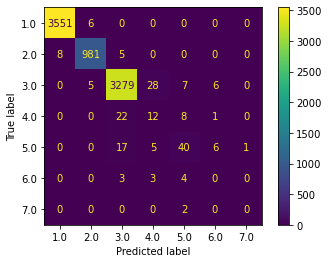

In [1276]:
#we can get the confusion matrix
cm = confusion_matrix(y_test, y2_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dtree, X_test, y_test)


In [565]:

from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy4 = balanced_accuracy_score(y_test, y2_hat)
print(accuracy4)

0.40328142458678096


0.9172036032608828
0.9144
0.9172036032608828
0.9144


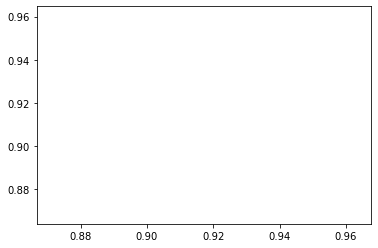

In [576]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#or we can use the functions
precision = precision_score(y_test, y2_hat, average='weighted')
recall = recall_score(y_test, y2_hat,average='weighted')

print(precision)
print(recall)

#we can plot the precision recall curve
#from sklearn.metrics import precision_recall_curve

#precision, recall, threshold = precision_recall_curve(y_test, y2_hat,)

print(precision)
print(recall)

import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.show()

In [560]:
from sklearn.svm import LinearSVC

svc= LinearSVC()
svc1=svc.fit(X_train,y_train);
y3_hat =svc1.predict(X_test)
y3_hat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([2., 2., 5., ..., 5., 2., 2.])

In [561]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(y_test, y3_hat)
print('Sklearn calculated accuracy:',accuracy3)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts3, = np.where(y3_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts3))

manual_accuracy3 = len(counts3) / len(y_test)

print('Manual accuracy:',manual_accuracy3)
print(counts3)
print('Prediction', y3_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.441
Number of data points in test data: 10000
Number of data points where prediction is correct: 4410
Manual accuracy: 0.441
[   0    1    4 ... 9990 9991 9996]
Prediction [2. 2. 5. ... 5. 2. 2.]
Actual     42510    2.0
49204    2.0
26543    3.0
18340    1.0
12200    2.0
        ... 
3690     1.0
16222    3.0
20564    3.0
23548    1.0
5210     1.0
Name: loan_status, Length: 10000, dtype: float64


0.8606299498783203
0.441
0.8606299498783203
0.441


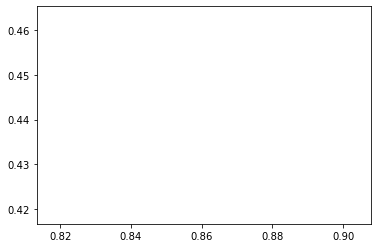

In [577]:
precision = precision_score(y_test, y3_hat, average='weighted')
recall = recall_score(y_test, y3_hat,average='weighted')

print(precision)
print(recall)

#we can plot the precision recall curve
#from sklearn.metrics import precision_recall_curve

#precision, recall, threshold = precision_recall_curve(y_test, y2_hat,)

print(precision)
print(recall)

import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.show()

# Training SVC in balanced X_train and y_train

In [1394]:
from sklearn.svm import LinearSVC

svc= LinearSVC()
svc2=svc.fit(X_res,y_res);
y4_hat =svc2.predict(X_test)
y4_hat

array([1., 7., 1., ..., 1., 1., 1.])

In [1400]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy4 = accuracy_score(y_test, y4_hat)
print('Sklearn calculated accuracy:',accuracy4)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts4, = np.where(y4_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts4))

manual_accuracy4 = len(counts4) / len(y_test)

print('Manual accuracy:',manual_accuracy4)
print(counts4)
print('Prediction', y4_hat)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.599125
Number of data points in test data: 8000
Number of data points where prediction is correct: 4793
Manual accuracy: 0.599125
[   0    2    3 ... 7997 7998 7999]
Prediction [1. 7. 1. ... 1. 1. 1.]
Actual     4096     1.0
5917     3.0
7398     1.0
33119    1.0
25509    1.0
        ... 
11714    3.0
35847    1.0
14201    1.0
13326    1.0
11896    1.0
Name: loan_status, Length: 8000, dtype: float64


In [563]:

from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy = balanced_accuracy_score(y_test, y4_hat)
print(accuracy)

0.4364144664968807


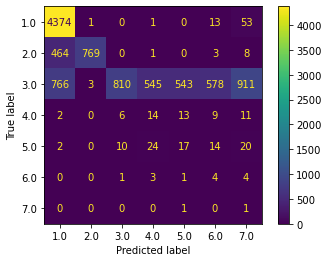

In [586]:
#clf = clf_nn
#clf.fit(X_train,y_train);
#y_hat = clf.predict(X_test)
#y_hat
#we can use the built in accuracy metrics in sklearn.
#accuracy = accuracy_score(y_test, y_hat)
#print('Sklearn calculated accuracy:',accuracy)

#we can get the confusion matrix
cm = confusion_matrix(y_test, y4_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc1, X_test, y_test)


In [ ]:
#Correlation with output variable
cor_target = abs(corrValue2["loan_status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.1]
relevant_features

In [ ]:
#random forest classifier

In [1433]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,
                          # n_informative=2, n_redundant=0,
                          # random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=100)
clf.fit(X_res, y_res)
clf_pred= clf.predict(X_test)
print(clf_pred)

[1. 1. 1. ... 3. 1. 3.]


In [1434]:
accuracy_RF = accuracy_score(y_test, clf_pred)
print('Sklearn calculated accuracy:',accuracy_RF)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts4, = np.where(clf_pred==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts4))

manual_accuracy_RF = len(counts4) / len(y_test)

print('Manual accuracy:',manual_accuracy_RF)
print(counts4)
print('Prediction', clf_pred)
print('Actual    ',y_test)

Sklearn calculated accuracy: 0.943875
Number of data points in test data: 8000
Number of data points where prediction is correct: 7551
Manual accuracy: 0.943875
[   0    1    2 ... 7997 7998 7999]
Prediction [1. 1. 1. ... 3. 1. 3.]
Actual     31274    1.0
21984    1.0
15062    1.0
7049     3.0
8206     3.0
        ... 
35788    3.0
31398    3.0
37395    3.0
475      1.0
9524     3.0
Name: loan_status, Length: 8000, dtype: float64


In [1428]:
from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy = balanced_accuracy_score(y_test, clf_pred)
print(accuracy)

0.38891592273173325


In [1429]:
precision = precision_score(y_test, clf_pred, average='weighted')
recall = recall_score(y_test, clf_pred,average='weighted')

print(precision)
print(recall)

0.9325797290124429
0.945


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


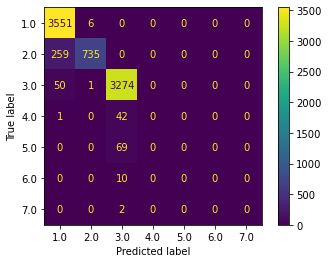

In [1431]:
cm = confusion_matrix(y_test, clf_pred)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)

In [1441]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(clf, X_res, y_res)

plot_roc_curve(clf, X_res, y_res)

ValueError: RandomForestClassifier should be a binary classifier

# Using Feature selection Algorithms

In [1383]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif

#Specify the features to consider and the Y values.  
feature_cols = FinalCols
#Y=Lending_data['loan_status']

#Note that currently our X values which are in ImputedX after imputation are an numpy ndarray
print(type(ImputedX))

# Keep all 12 features but rank them by best f_classif score
selector = SelectKBest(f_classif, k=40)

#Fit and apply feature ranking method
X_new = selector.fit_transform(ImputedX, y)

#Retrieve the column names for the selected columns
names = x.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
X_new.shape

<class 'numpy.ndarray'>
              Feat_names     F_Scores
1            loan_status          inf
11  last_fico_range_high  4947.316911
12   last_fico_range_low  3917.265240
17             out_prncp  3265.231081
18         out_prncp_inv  3264.131331
..                   ...          ...
25    mths_since_rcnt_il    31.868271
14           open_acc_6m    31.417028
34        bc_open_to_buy    31.279833
26  mo_sin_old_rev_tl_op    31.152327
30              all_util    30.958768

[40 rows x 2 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 4 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(40000, 40)

In [1380]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Keep all features but rank them by best mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=40)


#Fit and apply feature ranking method
X_new = selector.fit_transform(ImputedX, y)

#Retrieve the column names for the selected columns
names = x.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
 



             Feat_names  Mutual_info
1           loan_status     1.067146
17        out_prncp_inv     0.651830
16            out_prncp     0.648937
20      total_rec_prncp     0.626250
12  last_fico_range_low     0.228935
..                  ...          ...
10       fico_range_low     0.006551
39   num_tl_op_past_12m     0.006387
15  initial_list_status     0.006278
35       bc_open_to_buy     0.006080
38            num_il_tl     0.005566

[40 rows x 2 columns]


In [1385]:
varDf=ns_df_sorted['Feat_names'].values
som_df=set(varDf)
som_df

{'acc_open_past_24mths',
 'all_util',
 'bc_open_to_buy',
 'collection_recovery_fee',
 'fico_range_high',
 'fico_range_low',
 'hardship_flag',
 'id',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'int_rate',
 'last_fico_range_high',
 'last_fico_range_low',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_rcnt_il',
 'num_actv_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_tl_op_past_12m',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'recoveries',
 'term',
 'total_bc_limit',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp'}

In [1386]:
req_df = Clean_data[som_df]
req_df

,open_il_24m,total_rec_prncp,total_pymnt,all_util,collection_recovery_fee,id,open_rv_12m,out_prncp,fico_range_high,hardship_flag,...,mo_sin_rcnt_tl,loan_amnt,open_acc_6m,inq_last_12m,last_fico_range_low,acc_open_past_24mths,num_tl_op_past_12m,mo_sin_old_rev_tl_op,max_bal_bc,mths_since_rcnt_il
0,1.0,35000.00,43573.779596,47.0,0.0000,113924213.0,0.00,0.00,684.0,1.0,...,1.0,35000.0,1.00,1.00,685.0,5.0,1.0,46.0,5948.0,1.00
1,2.0,6376.13,13274.320000,40.0,386.6202,113101099.0,1.00,0.00,714.0,1.0,...,1.0,21000.0,1.00,1.00,585.0,4.0,1.0,199.0,6186.0,13.00
2,1.0,9265.31,15462.830000,46.0,0.0000,113672609.0,1.00,10734.69,764.0,1.0,...,2.0,20000.0,2.00,3.00,685.0,4.0,2.0,375.0,1315.0,3.00
3,2.0,16000.00,20685.951468,80.0,0.0000,115053799.0,2.00,0.00,674.0,1.0,...,2.0,16000.0,2.00,1.00,640.0,5.0,2.0,321.0,4888.0,16.00
4,1.0,24000.00,29997.021437,42.5,0.0000,6317122.0,2.75,0.00,789.0,1.0,...,10.0,24000.0,0.25,1.75,755.0,2.0,1.0,308.0,3329.5,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3.0,12000.00,13768.612814,73.0,0.0000,119356312.0,2.00,0.00,684.0,1.0,...,8.0,12000.0,0.00,0.00,600.0,5.0,4.0,153.0,6772.0,8.00
39996,1.0,10477.77,15539.970000,45.0,0.0000,125625080.0,2.00,14522.23,714.0,1.0,...,6.0,25000.0,2.00,2.00,720.0,6.0,3.0,211.0,6884.0,15.00
39997,0.0,6504.37,15770.470000,22.0,546.6438,118242831.0,2.00,0.00,694.0,1.0,...,1.0,27600.0,2.00,3.00,550.0,6.0,3.0,275.0,4626.0,35.00
39998,0.0,7000.00,7986.793003,51.0,0.0000,124811839.0,12.00,0.00,664.0,1.0,...,2.0,7000.0,3.00,4.00,620.0,15.0,12.0,232.0,3677.0,87.00


In [1387]:
req_df= req_df.drop('loan_status', axis=1)
req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open_il_24m              40000 non-null  float64
 1   total_rec_prncp          40000 non-null  float64
 2   total_pymnt              40000 non-null  float64
 3   all_util                 40000 non-null  float64
 4   collection_recovery_fee  40000 non-null  float64
 5   id                       40000 non-null  float64
 6   open_rv_12m              40000 non-null  float64
 7   out_prncp                40000 non-null  float64
 8   fico_range_high          40000 non-null  float64
 9   hardship_flag            40000 non-null  float64
 10  total_rec_int            40000 non-null  float64
 11  total_rec_late_fee       40000 non-null  float64
 12  last_fico_range_high     40000 non-null  float64
 13  inq_last_6mths           40000 non-null  float64
 14  int_rate              

In [1388]:

X1= req_df
y1 = x['loan_status']
y1.value_counts()
print(X1.shape)
print(x['loan_status'].value_counts())

(40000, 39)
1    17783
3    16627
2     4970
5      347
4      214
6       50
7        9
Name: loan_status, dtype: int64


In [1389]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_res1 = normalizer.fit_transform(X1)
X_res1= pd.DataFrame(X_res1)

In [1390]:
#Split X1 and Y1 in tain anf TEst
from sklearn.model_selection import train_test_split

#using stratify spliting since data set is higly imbalanced.
X1_train, X1_test, y1_train, y1_test = train_test_split(X_res1, y1, test_size=0.2, random_state=100,stratify=y)
y1_train
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 36964 to 4761
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32000 non-null  float64
 1   1       32000 non-null  float64
 2   2       32000 non-null  float64
 3   3       32000 non-null  float64
 4   4       32000 non-null  float64
 5   5       32000 non-null  float64
 6   6       32000 non-null  float64
 7   7       32000 non-null  float64
 8   8       32000 non-null  float64
 9   9       32000 non-null  float64
 10  10      32000 non-null  float64
 11  11      32000 non-null  float64
 12  12      32000 non-null  float64
 13  13      32000 non-null  float64
 14  14      32000 non-null  float64
 15  15      32000 non-null  float64
 16  16      32000 non-null  float64
 17  17      32000 non-null  float64
 18  18      32000 non-null  float64
 19  19      32000 non-null  float64
 20  20      32000 non-null  float64
 21  21      32000 non-null  float64


In [1391]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res2, y2_res = over_sampler.fit_resample(X1_train, y1_train)
print(f"Training target statistics: {Counter(y2_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({3: 14226, 1: 14226, 2: 14226, 5: 14226, 4: 14226, 6: 14226, 7: 14226})
Testing target statistics: Counter({1.0: 3557, 3.0: 3325, 2.0: 994, 5.0: 69, 4.0: 43, 6.0: 10, 7.0: 2})


In [1447]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X1_train, y1_train)

print(f"Training target statistics: {Counter(y_smt)}")
print(f"Testing target statistics: {Counter(y_test)}")

In [1448]:
print(f"Training target statistics: {Counter(y_smt)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({6: 14226, 7: 14226, 4: 14216, 2: 14204, 5: 14204, 1: 13633, 3: 13615})
Testing target statistics: Counter({1.0: 3557, 3.0: 3325, 2.0: 994, 5.0: 69, 4.0: 43, 6.0: 10, 7.0: 2})


In [1449]:
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_knn=clf_nn
clf_knn.fit(X_smt, y_smt)
yfs_hat = clf_knn.predict(X1_test)
yfs_hat

array([1, 4, 1, ..., 1, 1, 1])

In [1450]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y1_test, yfs_hat)
print('Sklearn calculated accuracy:',accuracy)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts, = np.where(yfs_hat==y1_test)

print('Number of data points in test data:',len(y1_test))
print('Number of data points where prediction is correct:',len(counts))

manual_accuracy = len(counts) / len(y_test)

print('Manual accuracy:',manual_accuracy)
print(counts)
print('Prediction', yfs_hat)
print('Actual    ',y1_test)

Sklearn calculated accuracy: 0.7585
Number of data points in test data: 8000
Number of data points where prediction is correct: 6068
Manual accuracy: 0.7585
[   0    2    3 ... 7997 7998 7999]
Prediction [1 4 1 ... 1 1 1]
Actual     4096     1
5917     3
7398     1
33119    1
25509    1
        ..
11714    3
35847    1
14201    1
13326    1
11896    1
Name: loan_status, Length: 8000, dtype: int32


Minimum error:- 0.187875 at K = 0


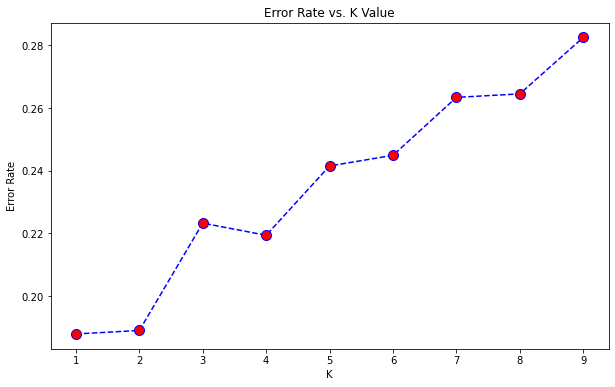

In [1451]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_smt, y_smt)
 pred_i = knn.predict(X1_test)
 error_rate.append(np.mean(pred_i != y1_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# SVC on feature selection DF

In [ ]:
from sklearn.svm import LinearSVC

svc= LinearSVC(multi_class='crammer_singer')
svc3=svc.fit(X_smt, y_smt);
y7_hat =svc3.predict(X1_test)
y7_hat

In [1453]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy7 = accuracy_score(y1_test, y7_hat)
print('Sklearn calculated accuracy:',accuracy7)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts4, = np.where(y7_hat==y1_test)

print('Number of data points in test data:',len(y1_test))
print('Number of data points where prediction is correct:',len(counts4))

manual_accuracy7 = len(counts4) / len(y1_test)

print('Manual accuracy:',manual_accuracy7)
print(counts4)
print('Prediction', y7_hat)
print('Actual    ',y1_test)

Sklearn calculated accuracy: 0.04075
Number of data points in test data: 8000
Number of data points where prediction is correct: 326
Manual accuracy: 0.04075
[   3   49   55   61   63  124  166  181  199  208  211  224  225  236
  300  304  324  343  441  452  462  505  514  618  654  667  690  698
  729  740  772  777  805  833  866  903  932  947  965  975 1008 1036
 1051 1185 1187 1227 1257 1279 1304 1305 1309 1311 1336 1342 1344 1363
 1368 1377 1388 1426 1459 1494 1517 1522 1533 1541 1567 1588 1686 1691
 1713 1716 1732 1742 1764 1773 1781 1815 1830 1839 1869 1900 1946 1947
 1959 1987 1991 2019 2022 2107 2118 2127 2144 2149 2197 2220 2234 2287
 2301 2313 2321 2344 2359 2389 2408 2488 2501 2527 2553 2567 2610 2630
 2655 2689 2703 2761 2777 2805 2806 2819 2827 2835 2870 2880 2902 2920
 2940 2963 2995 2999 3015 3055 3065 3107 3140 3171 3246 3257 3279 3310
 3337 3361 3371 3379 3384 3388 3392 3427 3441 3478 3492 3508 3525 3541
 3548 3566 3665 3671 3707 3726 3755 3790 3799 3801 3805 3822 

# CLustering K-Means

In [740]:
#standardizing the dataset
from sklearn.preprocessing import Normalizer

normalizer1 = Normalizer(norm='l2')
X_res2 = normalizer.fit_transform(Final_data)

In [785]:
from sklearn.cluster import KMeans


k_means = KMeans(6)
k_means.fit(Final_data)

labels_pred = k_means.predict(Final_data)
print(labels_pred)

[0 0 0 ... 1 0 0]


In [795]:
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=7)

In [796]:
pca

PCA(n_components=7)

In [889]:

data_PCA=pca.fit_transform(X_res2)
data_PCA


array([[ 0.55672947, -0.01171296, -0.20199679, ...,  0.03362534,
        -0.04935902, -0.01424839],
       [-0.13848257, -0.30780158,  0.21869791, ...,  0.01327393,
        -0.03323156,  0.00913852],
       [ 0.05271826,  0.01928381,  0.01083565, ..., -0.11538556,
         0.07084799, -0.04639834],
       ...,
       [-0.24083634, -0.16546962, -0.04240424, ..., -0.04810622,
         0.0042263 , -0.03467983],
       [ 0.41059582, -0.00465642, -0.34310069, ...,  0.02021548,
         0.0113145 , -0.01360404],
       [ 0.43386797,  0.20752957, -0.05203968, ..., -0.05240238,
        -0.06503887,  0.13678545]])

In [890]:
data_PCA= pd.DataFrame(data_PCA)
data_PCA.shape

(50000, 7)

In [891]:
pca.explained_variance_ratio_

array([0.66266201, 0.15838189, 0.1170785 , 0.03010172, 0.01981729,
       0.00502156, 0.00429143])

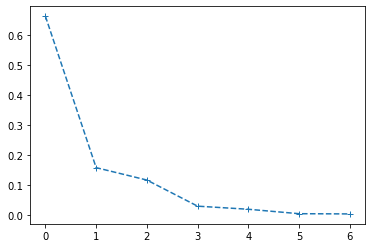

In [892]:
plt.plot(range(0,7), pca.explained_variance_ratio_, marker='+', linestyle='--')

In [893]:
from sklearn.cluster import KMeans


k_means_PCA = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmean_PCA=k_means_PCA.fit_transform(data_PCA)
#kmean_PCA=pd.DataFrame(kmean_PCA)
#labels_pred = k_means_PCA.predict(data_PCA)
print(labels_pred)

[1 4 1 ... 1 5 5]


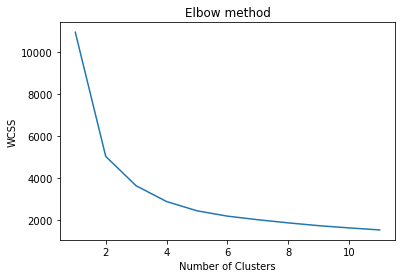

In [1294]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(data_PCA) for k in range (1,12)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 12), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [895]:
kmean_PCA= pd.DataFrame(kmean_PCA)

In [823]:
data_PCA.iloc[:,1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

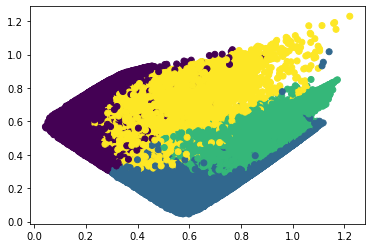

In [896]:
plt.scatter(kmean_PCA.iloc[:,0],kmean_PCA.iloc[:,1],c=k_means_PCA.labels_)

In [910]:
#New_dataframe= pd.concat([Final_data.reset_index(drop = "NaN"), pd.DataFrame(data_PCA)], axis=1)
#New_dataframe.columns.values[-7:]= ['1','2','3','4','5','6','7']
Final_data['K-mean PCA']= k_means_PCA.labels_ 
Final_data.head()


,index,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,grade,annual_inc,verification_status,...,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,K-mean PCA
0,0,1.0,1.0,1.0,35000.0,0.1505,1.0,1.0,110000.0,1.0,...,0.0,1.0,4.0,4.0,2.0,0.0,80.0,0.0,0.0,0
1,1,1.0,1.0,2.0,21000.0,0.1408,2.0,1.0,54000.0,2.0,...,0.0,0.0,3.0,3.0,34.0,0.0,100.0,1.0,0.0,1
2,2,1.0,2.0,3.0,20000.0,0.1408,2.0,1.0,74000.0,1.0,...,0.0,0.0,6.0,14.0,2.0,0.0,100.0,0.0,0.0,1
3,3,1.0,1.0,1.0,16000.0,0.1903,1.0,2.0,58000.0,3.0,...,0.0,0.0,8.0,20.0,4.0,0.0,95.7,1.0,0.0,1
4,4,1.0,2.0,1.0,24000.0,0.0890,2.0,3.0,94020.0,1.0,...,0.0,0.0,1.0,5.0,6.0,0.0,100.0,0.0,0.0,2


In [915]:
cols=New_dataframe.columns
for col in cols:
    Final_data[col] = np.exp(Final_data[col])

KeyError: '1'

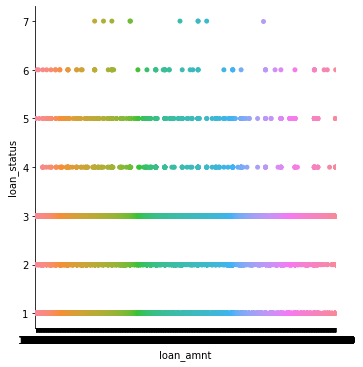

In [899]:
sns.catplot(x='loan_amnt', y='loan_status', data=New_dataframe)

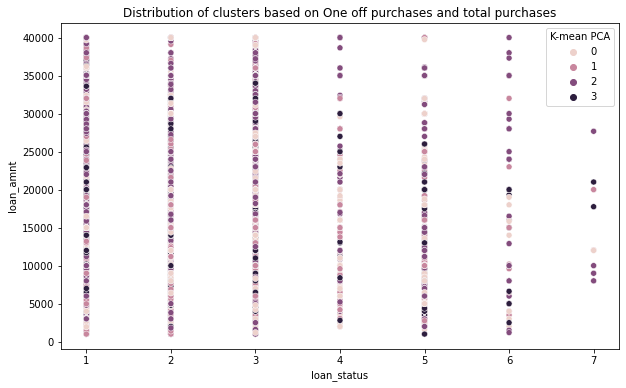

In [911]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=New_dataframe, x='loan_status', y='loan_amnt', hue='K-mean PCA')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

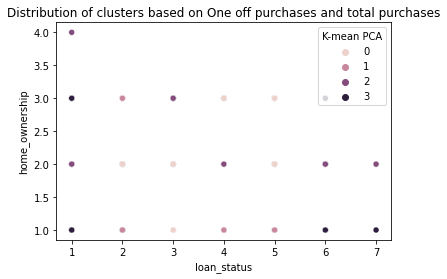

In [912]:
sns.scatterplot(data=New_dataframe, x='loan_status', y='home_ownership', hue='K-mean PCA')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

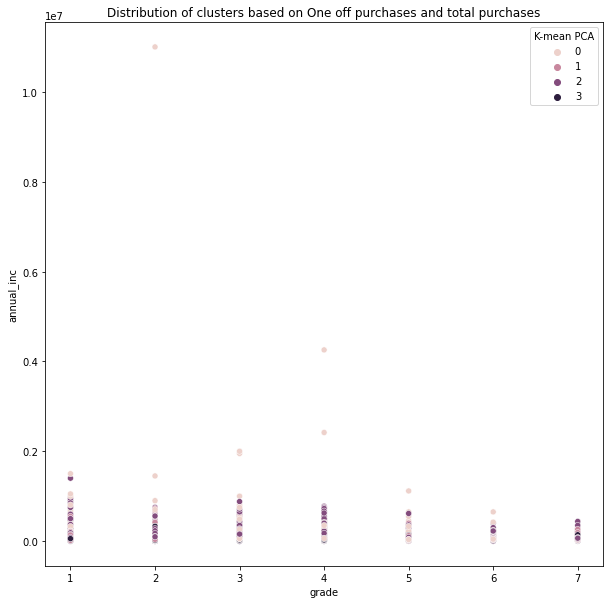

In [904]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=New_dataframe, x='grade', y='annual_inc', hue='K-mean PCA')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

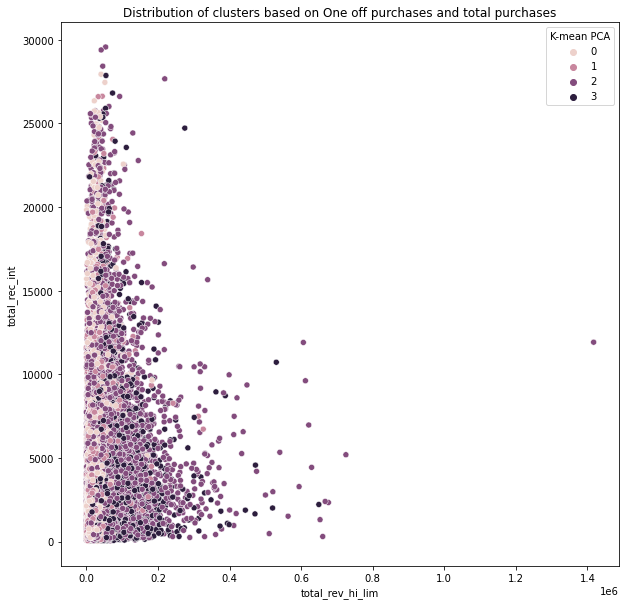

In [908]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=New_dataframe, x='total_rev_hi_lim', y='total_rec_int', hue='K-mean PCA')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

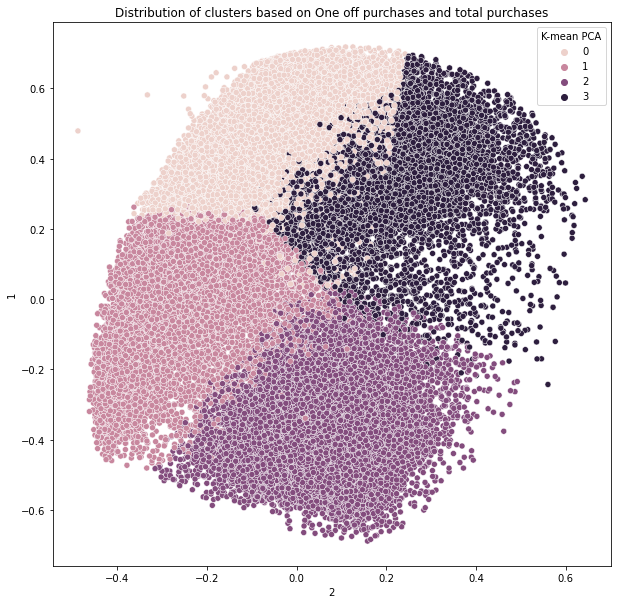

In [909]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=New_dataframe, x='2', y='1', hue='K-mean PCA')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [846]:
sns.catplot(x=kmean_PCA.iloc[:,0], y=kmean_PCA.iloc[:,1], data=kmeans_models)

AttributeError: 'list' object has no attribute 'get'

# Clustering 

In [916]:
#using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average', n_clusters=3)
clustering.fit_transform(X_res2)



AttributeError: 'AgglomerativeClustering' object has no attribute 'fit_transform'

In [743]:
X1= Final_data.drop("loan_status" , axis= 1).to_numpy()
y1 = Final_data['loan_status']
y1.value_counts()

1.0    22210
3.0    20779
2.0     6227
5.0      435
4.0      274
6.0       65
7.0       10
Name: loan_status, dtype: int64

In [744]:
from sklearn.cluster import KMeans


k_means = KMeans(6)
k_means.fit(X1)

labels_pred = k_means.predict(X1)
print(labels_pred)

[3 3 3 ... 0 3 3]


In [745]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y1,labels_pred )
print(abs(score))

0.009411787786699544


In [746]:
from sklearn.metrics.cluster import adjusted_mutual_info_score


score = adjusted_mutual_info_score(y1, labels_pred)
score

0.0020999177397478808

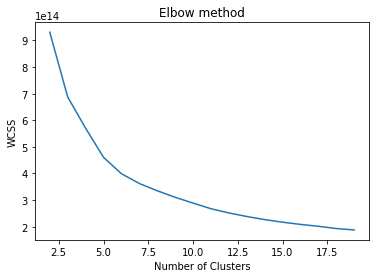

In [753]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(X1) for k in range (2,20)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(2, 20), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()